In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

pd.set_option("display.max_columns", None)


#É preciso indicar que o arquivo está usando "," como separador da parte decimal dos números float
df = pd.read_csv('socioeco_usp_ingres_2017.csv', sep=';', encoding='latin-1', decimal=',')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         55 non-null     object 
 1   Nome do Curso de Graduação           55 non-null     object 
 2   Código do Município do Curso         55 non-null     int64  
 3   Município                            55 non-null     object 
 4   Carreira USP                         55 non-null     int64  
 5   Curso USP                            55 non-null     object 
 6   P1  Sexo                            55 non-null     object 
 7   P2  Estado Civil                    55 non-null     object 
 8   P3  Cor/Raça                        55 non-null     object 
 9   P3  Cor/Raça não Branco             55 non-null     float64
 10  P4  Distância 1                     55 non-null     object 
 11  P4  Distância 2                  

In [2]:
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo,P2  Estado Civil,P3  Cor/Raça,P3  Cor/Raça não Branco,P4  Distância 1,P4  Distância 2,P5  Onde EF,P6  Onde EM,P7  Tipo EM,P8  Turno EM,P9  Cursinho 1,P9  Cursinho 2,P10  Curso Superior 1,P10  Curso Superior 2,P11  Renda Bruta 1,P11  Renda Bruta 2,P12  Pessoas vivem 1,P12  Pessoas vivem 2,P13  Pessoas contribuem 1,P13  Pessoas contribuem 2,P14  Instrução Pai 1,P14  Instrução Pai 2,P15  Instrução Mãe 1,P15  Instrução Mãe 2,P16  Atividade Remunerada 1,P16  Atividade Remunerada 2,P17  Onde Internet 1,P17  Onde Internet 2,P18  Situação Ocupacional 1,P18  Situação Ocupacional 2,P19  Imóvel 1,P19  Imóvel 2,P20  Propriedade além 1,P20  Propriedade além 2,P21  Como se manter 1,P21  Como se manter 2,P22  Carros 1,P22  Carros 2,P23  Computadores 1,P23  Computadores 2,P24  Treineiro,P25  Outro Vestibular,P26  Quantos FUVEST,P27  Convocado Matrícula,P28  PASUSP,P28  PASUSP SIM,P29  INCLUSP,P29  INCLUSP SIM,P30  INCLUSP?EB,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI,P31  INCLUSP?PPI SIM,P32  Idade 1,P32  Idade 2,P33  EP Cor/Raça,P34  EP EF,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021
0,2927,ADMINISTRAÇÃO,3543402,Ribeirão Preto,100,10/15,Masculino,Solteiro,Branca,11.9,Entre 101 e 300 km,Abaixo de 11 km,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),Não,"Sim, durante um ano.",Não,"Sim, mas o abandonei",Entre 3 e 5 SM,Entre 7 e 10 SM,Quatro,Três,Duas,Uma,Ensino superior completo,Pós?graduação completa.,Ensino superior completo,Pós?graduação completa,Não,"Sim, eventual",Em casa,Em casa,Proprietário de pequena ou microempresa,Assalariado com contrato formal (empresa públi...,"Próprio, quitado",Alugado,Nenhuma,Uma,Somente com recursos dos pais,"Trabalhando, mas contando, para o essencial, c...",Dois,Um,Dois,Um,Não,"Sim, da UNICAMP e da UNESP",Nenhum,Não,Não,0.0,Não,11.9,Não,8.3,Não,3.6,17 anos,18 anos,Branca,Todo em escola pública,52.5,32.3,15.2,0.0,8.0,2.0,3.0,2.0
1,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,Masculino,Solteiro,Branca,7.6,Entre 101 e 300 km,Abaixo de 11 km,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),Não,"Sim, durante um ano",Não,"Sim, mas o abandonei",Entre 3 e 5 SM,Entre 5 e 7 SM,Quatro,Três,Duas,Uma,Ensino superior completo,Ensino médio completo,Ensino superior completo,Pós?graduação completa,Não,"Sim, regularmente, em tempo integral",Em casa,Em casa,Assalariado com contrato formal (empresa públi...,Proprietário de pequena ou microempresa,"Próprio, quitado",Alugado,Nenhuma,Uma,"Trabalhando, mas contando, para o essencial, c...",Somente com recursos dos pais,Dois,Um,Dois,Um,Não,"Sim, da UNICAMP e da UNESP",Nenhum,Não,Não,2.9,Não,17.1,Não,11.4,Não,2.9,18 anos,19 anos,Branca,Todo em escola pública,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6
2,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,Feminino,Solteiro,Branca,18.9,Entre 11 e 30 km,Abaixo de 11 km,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),"Sim, durante um ano",Não,Não,"Sim, mas irei abandoná?lo se passar neste vest...",Acima de 20 SM,Entre 5 e 7 SM,Quatro,Três,Duas,Uma,Ensino superior completo,Pós?graduação completa,Ensino superior completo,Pós?graduação completa,Não,"Sim, eventual",Em casa,Em casa,Assalariado com contrato formal (empresa públi...,Profissional liberal (que exerce atividade com...,"Próprio, quitado","Próprio, com financiamento em curso",Nenhuma,Uma,"Trabalhando, mas contando, para o essencial, c...",Somente com recursos dos pais,Um,Dois,Dois,Três,Não,"Sim, da UNICAMP e da UNESP",Um,Não,Não,0.9,Não,12.3,Não,6.6,Não,1.9,19 anos,17 anos,Branca,Todo em escola pública,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3
3,2886,ARQUI

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         55 non-null     object 
 1   Nome do Curso de Graduação           55 non-null     object 
 2   Código do Município do Curso         55 non-null     int64  
 3   Município                            55 non-null     object 
 4   Carreira USP                         55 non-null     int64  
 5   Curso USP                            55 non-null     object 
 6   P1  Sexo                            55 non-null     object 
 7   P2  Estado Civil                    55 non-null     object 
 8   P3  Cor/Raça                        55 non-null     object 
 9   P3  Cor/Raça não Branco             55 non-null     float64
 10  P4  Distância 1                     55 non-null     object 
 11  P4  Distância 2                  

In [4]:
#Vamos preprocessar algumas informações

In [5]:
df['P4  Distância 1'].unique()

array(['Entre 101 e 300 km', 'Entre 11 e 30 km', 'Abaixo de 11 km',
       'Entre 11 e 30 km.', 'Entre 101 e 300 km.', 'Acima de 300 km',
       'Entre 31 e 60 km'], dtype=object)

In [6]:
# Dicionário de mapeamento de valores de distância por extenso para valores numéricos em ordem de grandeza
mapeamento = {
    'Abaixo de 11 km': 1,
    'Entre 11 e 30 km': 2,
    'Entre 11 e 30 km.':2,
    'Entre 31 e 60 km': 3,
    'Entre 31 e 60 km.':3,
    'Entre 61 e 80 km': 4,
    'Entre 81 e 100 km': 5,
    'Entre 101 e 300 km': 6,
    'Entre 101 e 300 km.': 6,
    'Acima de 300 km': 7,
}

# Aplicar a transformação usando a função map do pandas
df['P4  Distância 1'] = df['P4  Distância 1'].map(mapeamento)

In [7]:
# Aplicar a transformação usando a função map do pandas
df['P4  Distância 2'] = df['P4  Distância 2'].map(mapeamento)

In [8]:
# Dicionário de mapeamento de valores de distância por extenso para valores numéricos em ordem de grandeza
mapeamento2 = {
    'Não':0.0,
    'Sim, intensivo de seis meses': 0.5,
    'Sim, durante um ano': 1.0,
    'Sim, durante um ano.':1.0,
    'Sim, já é o segundo ano em que frequento cursinho': 2.0
}

# Aplicar a transformação usando a função map do pandas
df['P9  Cursinho 1'] = df['P9  Cursinho 1'].map(mapeamento2)

In [9]:
# Aplicar a transformação usando a função map do pandas
df['P9  Cursinho 2'] = df['P9  Cursinho 2'].map(mapeamento2)

In [10]:
# Dicionário de mapeamento
mapeamento3 = {
    'Inferior a 1 SM':1,
    'Entre 1 e 2 SM': 2,
    'Entre 2 e 3 SM': 3,
    'Entre 3 e 5 SM': 4,
    'Entre 5 e 7 SM': 5,
    'Entre 5 e 7 SM.': 5,
    'Entre 7 e 10 SM': 6,
    'Entre 10 e 15 SM': 7,
    'Entre 10 e 15 SM.':7,
    'Entre 15 e 20 SM': 8,
    'Acima de 20 SM': 9,
}

# Aplicar a transformação usando a função map do pandas
df['P11  Renda Bruta 1'] = df['P11  Renda Bruta 1'].map(mapeamento3)

In [11]:
# Aplicar a transformação usando a função map do pandas
df['P11  Renda Bruta 2'] = df['P11  Renda Bruta 2'].map(mapeamento3)

In [12]:
# Dicionário de mapeamento
mapeamento4 = {
    'Uma':1,
    'Duas': 2,
    'Três': 3,
    'Quatro': 4,
    'Cinco': 5,
}

# Aplicar a transformação usando a função map do pandas
df['P12  Pessoas vivem 1'] = df['P12  Pessoas vivem 1'].map(mapeamento4)

In [13]:
df['P12  Pessoas vivem 2'] = df['P12  Pessoas vivem 2'].map(mapeamento4)

In [14]:
# Dicionário de mapeamento
mapeamento5 = {
    'Uma':1,
    'Duas': 2,
    'Três': 3,
    'Quatro ou mais': 4,
}

# Aplicar a transformação usando a função map do pandas
df['P13  Pessoas contribuem 1'] = df['P13  Pessoas contribuem 1'].map(mapeamento5)

In [15]:
# Aplicar a transformação usando a função map do pandas
df['P13  Pessoas contribuem 2'] = df['P13  Pessoas contribuem 2'].map(mapeamento5)

In [16]:
# Dicionário de mapeamento
mapeamento6 = {
    'Não estudou':1,
    'Ensino fundamental incompleto': 2,
    'Ensino fundamental completo': 3,
    'Ensino médio incompleto': 4,
    'Ensino médio completo':5,
    'Ensino médio completo.': 5,
    'Ensino superior incompleto': 6,
    'Ensino superior completo': 7,
    'Ensino superior completo.': 7,
    'Pós−graduação incompleta': 8,
    'Pós?graduação completa': 9,
    'Pós?graduação completa.':9
}

# Aplicar a transformação usando a função map do pandas
df['P14  Instrução Pai 1'] = df['P14  Instrução Pai 1'].map(mapeamento6)

In [17]:
# Aplicar a transformação usando a função map do pandas
df['P14  Instrução Pai 2'] = df['P14  Instrução Pai 2'].map(mapeamento6)

In [18]:
# Aplicar a transformação usando a função map do pandas
df['P15  Instrução Mãe 1'] = df['P15  Instrução Mãe 1'].map(mapeamento6)

In [19]:
# Aplicar a transformação usando a função map do pandas
df['P15  Instrução Mãe 2'] = df['P15  Instrução Mãe 2'].map(mapeamento6)

In [20]:
mapeamento7 = {
    'Não':0,
    'Não.': 0,
    'Sim, eventual': 1,
    'Sim, eventual.': 1,
    'Sim, regularmente, em tempo parcial': 2,
    'Sim, regularmente, em tempo integral': 3,
    'Sim, regularmente, em tempo integral.': 3
}

# Aplicar a transformação usando a função map do pandas
df['P16  Atividade Remunerada 1'] = df['P16  Atividade Remunerada 1'].map(mapeamento7)

In [21]:
# Aplicar a transformação usando a função map do pandas
df['P16  Atividade Remunerada 2'] = df['P16  Atividade Remunerada 2'].map(mapeamento7)

In [22]:
mapeamento8 = {
    'Nenhuma':0,
    'Nenhuma.': 0,
    'Uma': 1,
}

# Aplicar a transformação usando a função map do pandas
df['P20  Propriedade além 1'] = df['P20  Propriedade além 1'].map(mapeamento8)

In [23]:
# Aplicar a transformação usando a função map do pandas
df['P20  Propriedade além 2'] = df['P20  Propriedade além 2'].map(mapeamento8)

In [24]:
mapeamento9 = {
    'Nenhum':0,
    'Um': 1,
    'Dois': 2,
}

# Aplicar a transformação usando a função map do pandas
df['P22  Carros 1'] = df['P22  Carros 1'].map(mapeamento9)

In [25]:
# Aplicar a transformação usando a função map do pandas
df['P22  Carros 2'] = df['P22  Carros 2'].map(mapeamento9)

In [26]:
mapeamento10 = {
    'Nenhum':0,
    'Um': 1,
    'Dois': 2,
    'Três': 3,
    'Quatro ou mais': 4
}

# Aplicar a transformação usando a função map do pandas
df['P23  Computadores 1'] = df['P23  Computadores 1'].map(mapeamento10)

In [27]:
df['P23  Computadores 2'] = df['P23  Computadores 2'].map(mapeamento10)

In [28]:
mapeamento11 = {
    'Até 16 anos':16,
    '17 anos': 17,
    '18 anos': 18,
    '18 anos ': 18,
    '19 anos': 19,
    '20 anos': 20,
    '21 anos': 21,
    'de 22 a 25 anos': 22,
    'Acima de 25 anos': 25    
}

# Aplicar a transformação usando a função map do pandas
df['P32  Idade 1'] = df['P32  Idade 1'].map(mapeamento11)

In [29]:
# Aplicar a transformação usando a função map do pandas
df['P32  Idade 2'] = df['P32  Idade 2'].map(mapeamento11)

In [30]:
print('Média: ', df['Taxa de Desistência Acumulada - TDA'].mean())
print('Médiana: ', df['Taxa de Desistência Acumulada - TDA'].median())
print('Desvio Padrão: ', df['Taxa de Desistência Acumulada - TDA'].std())

Média:  19.34545454545454
Médiana:  18.3
Desvio Padrão:  11.229768939640318


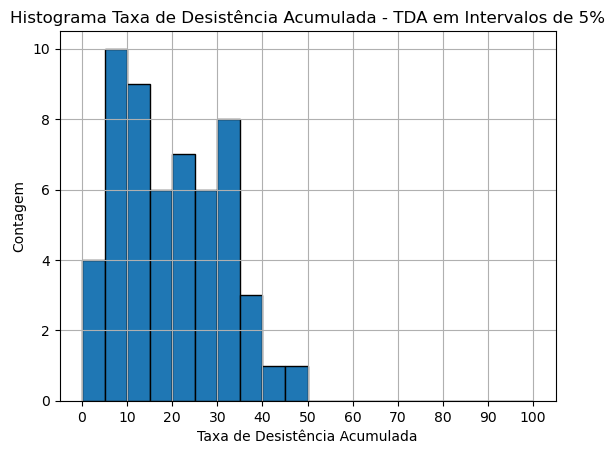

In [31]:
#Vamos verificar o histograma
# Defina os limites das bins em intervalos de 5%
bins = [i for i in range(0 , 101 , 5)]  # Isso cria uma lista de 0 a 100

# Crie o histograma usando o método hist do pandas
df['Taxa de Desistência Acumulada - TDA'].plot(kind='hist', bins=bins, edgecolor='k')

# Personalize o gráfico
plt.title('Histograma Taxa de Desistência Acumulada - TDA em Intervalos de 5%')
plt.xlabel('Taxa de Desistência Acumulada')
plt.ylabel('Contagem')
plt.xticks(range(0, 101, 10))  # Personalize os rótulos do eixo x
plt.grid(True)

# Exiba o gráfico
plt.show()

In [32]:
# Função para atribuir classe "Abaixo da Média" ou "Acima da Média" com base no TDA
def atribuir_classe(valor, limiar):
    if valor > limiar:
        return 'Acima da Média'
    else:
        return 'Abaixo da Média'


# Aplicar a função à coluna 'Taxa de Desistência Acumulada - TDA' e criar uma nova coluna 'Classe alvo'
media = df['Taxa de Desistência Acumulada - TDA'].mean()
limiar = media
df['Classe alvo'] = df['Taxa de Desistência Acumulada - TDA'].apply(atribuir_classe, args=(limiar,))
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo,P2  Estado Civil,P3  Cor/Raça,P3  Cor/Raça não Branco,P4  Distância 1,P4  Distância 2,P5  Onde EF,P6  Onde EM,P7  Tipo EM,P8  Turno EM,P9  Cursinho 1,P9  Cursinho 2,P10  Curso Superior 1,P10  Curso Superior 2,P11  Renda Bruta 1,P11  Renda Bruta 2,P12  Pessoas vivem 1,P12  Pessoas vivem 2,P13  Pessoas contribuem 1,P13  Pessoas contribuem 2,P14  Instrução Pai 1,P14  Instrução Pai 2,P15  Instrução Mãe 1,P15  Instrução Mãe 2,P16  Atividade Remunerada 1,P16  Atividade Remunerada 2,P17  Onde Internet 1,P17  Onde Internet 2,P18  Situação Ocupacional 1,P18  Situação Ocupacional 2,P19  Imóvel 1,P19  Imóvel 2,P20  Propriedade além 1,P20  Propriedade além 2,P21  Como se manter 1,P21  Como se manter 2,P22  Carros 1,P22  Carros 2,P23  Computadores 1,P23  Computadores 2,P24  Treineiro,P25  Outro Vestibular,P26  Quantos FUVEST,P27  Convocado Matrícula,P28  PASUSP,P28  PASUSP SIM,P29  INCLUSP,P29  INCLUSP SIM,P30  INCLUSP?EB,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI,P31  INCLUSP?PPI SIM,P32  Idade 1,P32  Idade 2,P33  EP Cor/Raça,P34  EP EF,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021,Classe alvo
0,2927,ADMINISTRAÇÃO,3543402,Ribeirão Preto,100,10/15,Masculino,Solteiro,Branca,11.9,6,1,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),0.0,1.0,Não,"Sim, mas o abandonei",4,6,4,3,2,1,7,9,7,9,0,1,Em casa,Em casa,Proprietário de pequena ou microempresa,Assalariado com contrato formal (empresa públi...,"Próprio, quitado",Alugado,0,1,Somente com recursos dos pais,"Trabalhando, mas contando, para o essencial, c...",2,1,2,1,Não,"Sim, da UNICAMP e da UNESP",Nenhum,Não,Não,0.0,Não,11.9,Não,8.3,Não,3.6,17,18,Branca,Todo em escola pública,52.5,32.3,15.2,0.0,8.0,2.0,3.0,2.0,Abaixo da Média
1,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,Masculino,Solteiro,Branca,7.6,6,1,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),0.0,1.0,Não,"Sim, mas o abandonei",4,5,4,3,2,1,7,5,7,9,0,3,Em casa,Em casa,Assalariado com contrato formal (empresa públi...,Proprietário de pequena ou microempresa,"Próprio, quitado",Alugado,0,1,"Trabalhando, mas contando, para o essencial, c...",Somente com recursos dos pais,2,1,2,1,Não,"Sim, da UNICAMP e da UNESP",Nenhum,Não,Não,2.9,Não,17.1,Não,11.4,Não,2.9,18,19,Branca,Todo em escola pública,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6,Acima da Média
2,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,Feminino,Solteiro,Branca,18.9,2,1,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),1.0,0.0,Não,"Sim, mas irei abandoná?lo se passar neste vest...",9,5,4,3,2,1,7,9,7,9,0,1,Em casa,Em casa,Assalariado com contrato formal (empresa públi...,Profissional liberal (que exerce atividade com...,"Próprio, quitado","Próprio, com financiamento em curso",0,1,"Trabalhando, mas contando, para o essencial, c...",Somente com recursos dos pais,1,2,2,3,Não,"Sim, da UNICAMP e da UNESP",Um,Não,Não,0.9,Não,12.3,Não,6.6,Não,1.9,19,17,Branca,Todo em escola pública,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3,Abaixo da Média
3,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,Feminino,Solteiro,Branca,19.3,6,7,Todo em escola particular,Todo em escola particular,Ensino médio comum,Diurno (só manhã ou só tarde),1.0,0.0,Não,"Sim, mas irei abandoná?lo se passar neste vest...",6,7,4,3,2,1,7,9,9,7,0,1,Em casa,Em casa,Assalariado com contrato formal (empresa públi...,Profissional liberal (que exerce atividade com...,"Próprio, quitado","Próprio, com financiamento em curso",0,1,Somente com recursos dos pais,"Trabalhando, mas contando, para o essencial, c...",2,1,2,4,Não,"Sim, da UNICAMP e da UNESP",Um,Não,Não,0.0,Não,9.7,Não,3.2,Não,3.1,19,18,Branca,

In [33]:
# Selecionar colunas de recursos e alvo
X = df[['Município', 'P1  Sexo', 'P2  Estado Civil', 'P3  Cor/Raça',
       'P3  Cor/Raça não Branco', 'P4  Distância 1', 'P4  Distância 2',
       'P5  Onde EF', 'P6  Onde EM', 'P7  Tipo EM', 'P8  Turno EM',
       'P9  Cursinho 1', 'P9  Cursinho 2', 'P10  Curso Superior 1',
       'P10  Curso Superior 2', 'P11  Renda Bruta 1', 'P11  Renda Bruta 2',
       'P12  Pessoas vivem 1', 'P12  Pessoas vivem 2',
       'P13  Pessoas contribuem 1', 'P13  Pessoas contribuem 2',
       'P14  Instrução Pai 1', 'P14  Instrução Pai 2',
       'P15  Instrução Mãe 1', 'P15  Instrução Mãe 2',
       'P16  Atividade Remunerada 1', 'P16  Atividade Remunerada 2',
       'P17  Onde Internet 1', 'P17  Onde Internet 2',
       'P18  Situação Ocupacional 1', 'P18  Situação Ocupacional 2',
       'P19  Imóvel 1', 'P19  Imóvel 2', 'P20  Propriedade além 1',
       'P20  Propriedade além 2', 'P21  Como se manter 1',
       'P21  Como se manter 2', 'P22  Carros 1', 'P22  Carros 2',
       'P23  Computadores 1', 'P23  Computadores 2', 'P24  Treineiro',
       'P25  Outro Vestibular', 'P26  Quantos FUVEST',
       'P27  Convocado Matrícula', 'P28  PASUSP', 'P28  PASUSP SIM',
       'P29  INCLUSP', 'P29  INCLUSP SIM', 'P30  INCLUSP?EB',
       'P30  INCLUSP?EB SIM', 'P31  INCLUSP?PPI', 'P31  INCLUSP?PPI SIM',
       'P32  Idade 1', 'P32  Idade 2', 'P33  EP Cor/Raça', 'P34  EP EF',
       ]]  # Variáveis preditoras
y = df['Classe alvo']  # Variável alvo

In [34]:
# Codificar as colunas categóricas para números usando LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if type(X[column][0]) == str:
        X[column] = label_encoder.fit_transform(X[column])


X['P16  Atividade Remunerada 1']

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1056\3319681800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
Name: P16  Atividade Remunerada 1, dtype: int64

# Como são poucos dados, vamos utilizar o método Leave One Out

In [35]:
# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                         Feature  Importance
42        P25  Outro Vestibular    0.172481
48             P29  INCLUSP SIM    0.128460
26  P16  Atividade Remunerada 2    0.123015
44     P27  Convocado Matrícula    0.109414
21         P14  Instrução Pai 1    0.065026
16           P11  Renda Bruta 2    0.053404
18         P12  Pessoas vivem 2    0.043396
40          P23  Computadores 2    0.042169
15           P11  Renda Bruta 1    0.040887
52         P31  INCLUSP?PPI SIM    0.031910
22         P14  Instrução Pai 2    0.030630
4       P3  Cor/Raça não Branco    0.028187
12               P9  Cursinho 2    0.021848
50          P30  INCLUSP?EB SIM    0.015296
37                P22  Carros 1    0.013216
6               P4  Distância 2    0.012902
36        P21  Como se manter 2    0.011534
5               P4  Distância 1    0.010645
54                 P32  Idade 2    0.008818
24         P15  Instrução Mãe 2    0.007122
14        P10  Curso Superior 2    0.006010
8         

In [36]:
feature_importances_list[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03412088, 0.        , 0.        ,
       0.05454105, 0.12507185, 0.        , 0.06086221, 0.        ,
       0.        , 0.06135868, 0.08653846, 0.        , 0.        ,
       0.        , 0.14850618, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02008929, 0.        , 0.        ,
       0.        , 0.        , 0.24793956, 0.        , 0.16097184,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [37]:
accuracies

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0]